In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy as sc

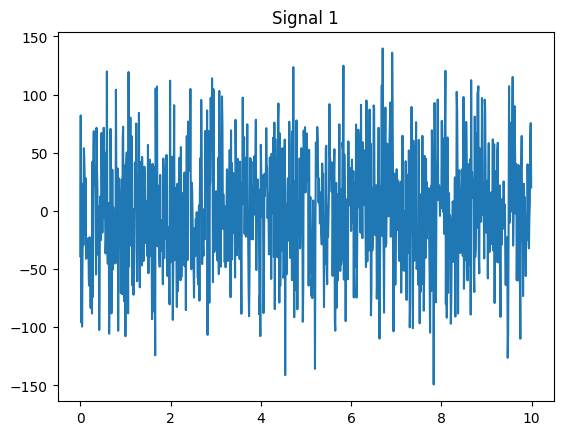

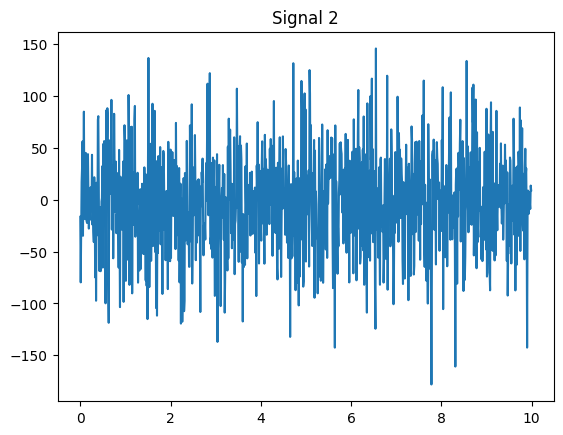

In [7]:
# signal 1
time=np.arange(0,10,0.01)
cossignal1= np.sin(2*np.pi*time) + np.sin(10*np.pi*time) + np.random.normal(0,50,len(time))
 
plt.plot(time,cossignal1)
plt.title("Signal 1")
plt.show()
 
 
# signal 2
cossignal2= 0.5*np.sin(4*np.pi*time) + 0.5*np.sin(10*np.pi*time) + np.random.normal(0,50,len(time))
 
plt.plot(time,cossignal2)
plt.title("Signal 2")
plt.show()

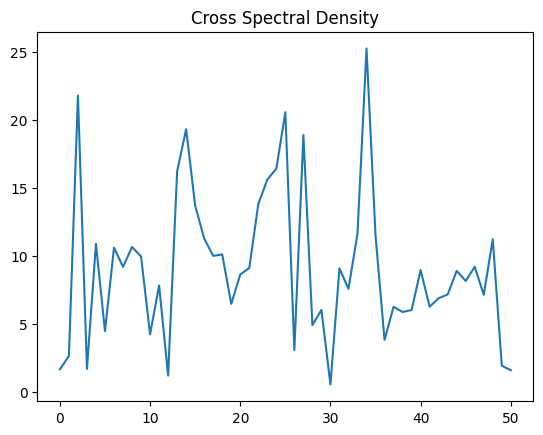

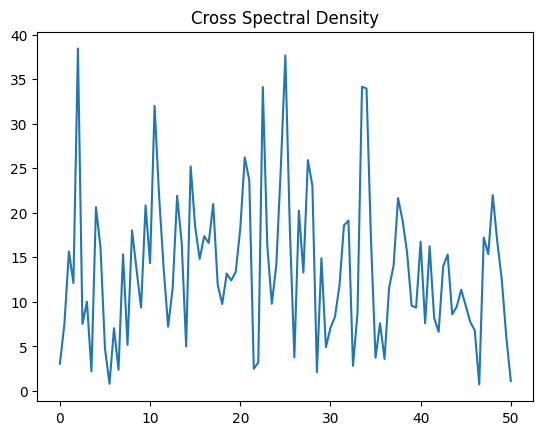

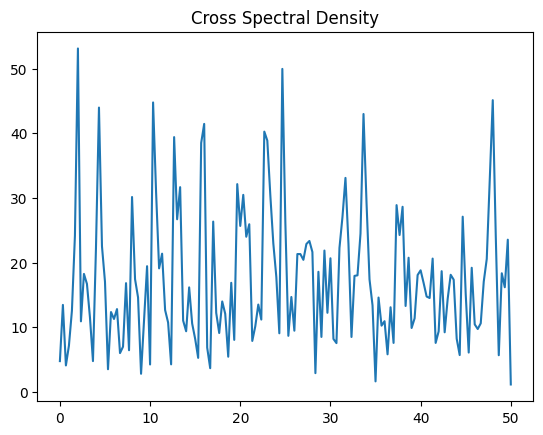

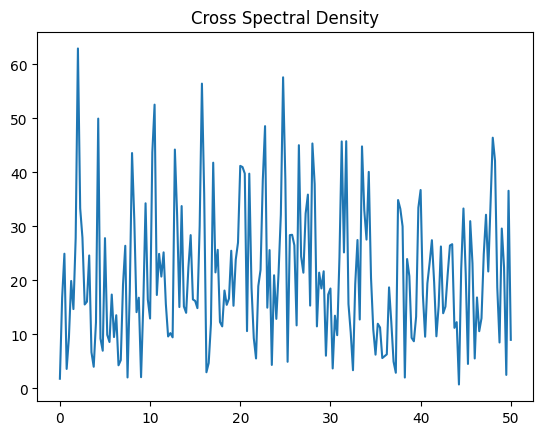

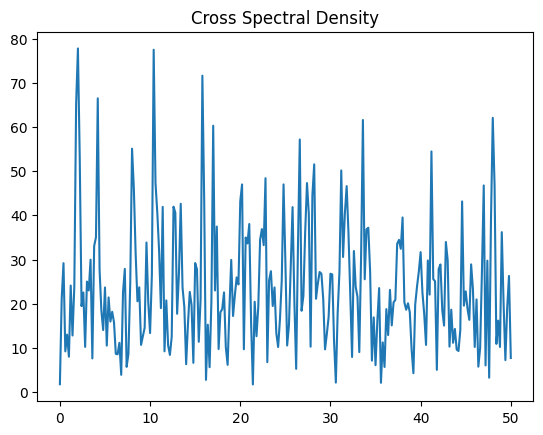

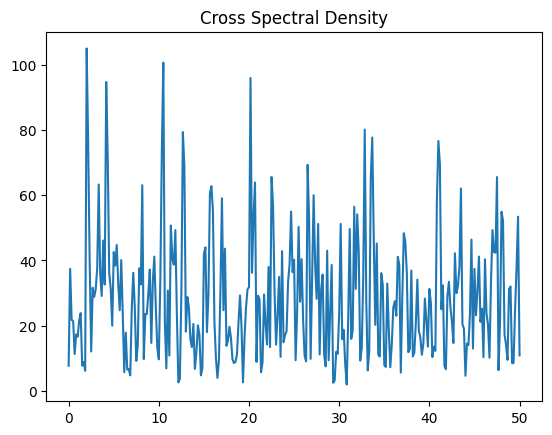

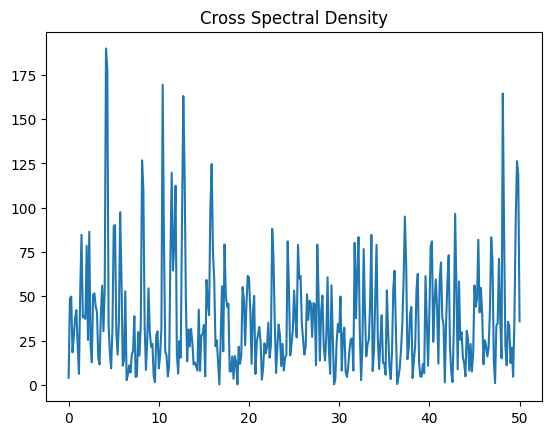

In [8]:
for n in [100, 200, 300, 400, 500, 600, 700]:
    cross_spectrum = signal.csd(cossignal1, cossignal2, nperseg=n, noverlap=n//2, fs=1/0.01)
    plt.plot(cross_spectrum[0], np.abs(cross_spectrum[1]))
    plt.title("Cross Spectral Density")
    plt.show()

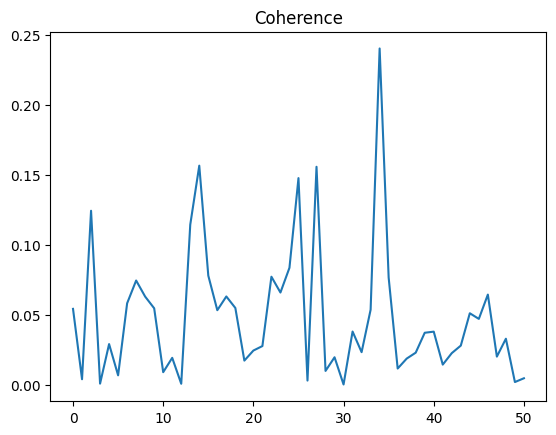

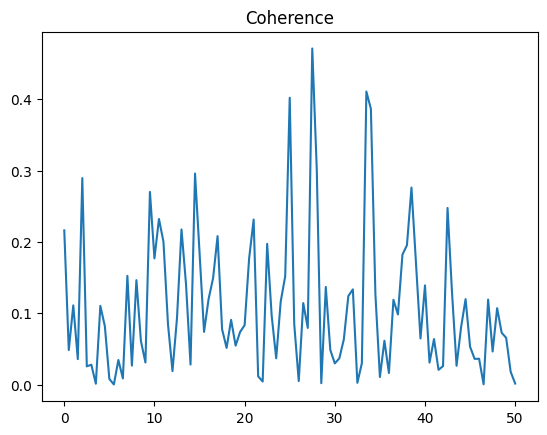

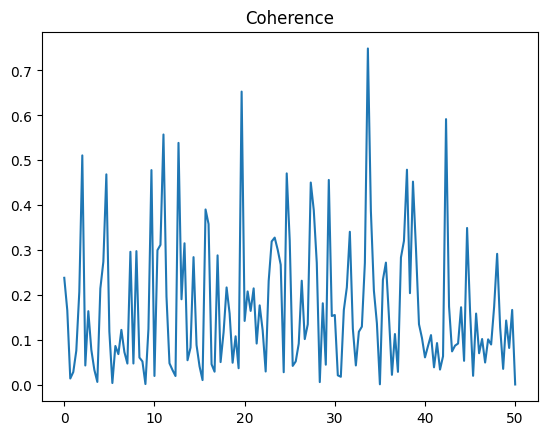

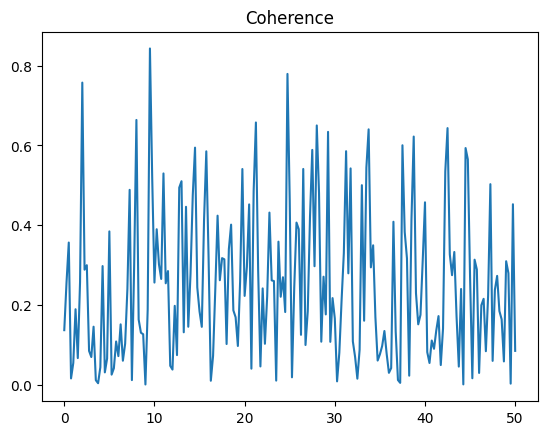

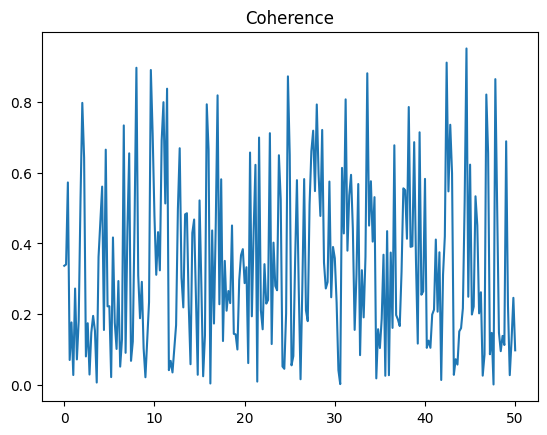

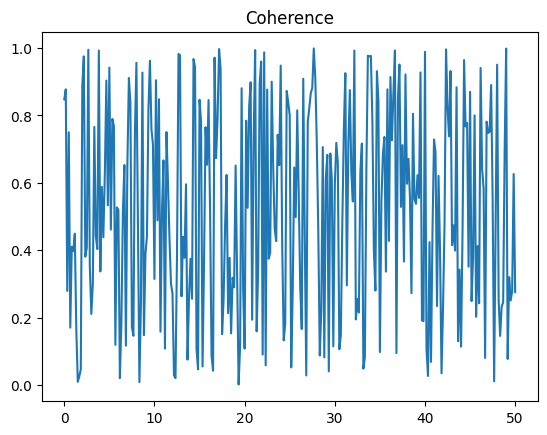

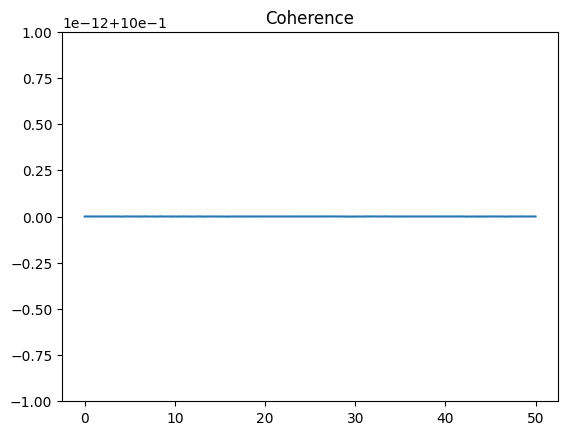

In [9]:
for n in [100, 200, 300, 400, 500, 600, 700]:
    coh = signal.coherence(cossignal1, cossignal2, nperseg=n, noverlap=n//2, fs=1/0.01)
    plt.plot(coh[0], coh[1])
    plt.title("Coherence")
    plt.show()

In [31]:
def PSD_Welsh(x, nperseg=250, overlap=100, window='hann', padding = False):

    D = nperseg - overlap
    L = nperseg
    if padding and (len(x) - L) % D != 0:
        # Zero padding
        x = np.append(x, np.zeros(L - (len(x) - L) % D))

    ind = 0
    K = 0

    if window == 'hann':
        window = signal.windows.hann(L)
    elif window == 'hamming':
        window = signal.windows.hamming(L)
    elif window == 'blackman':
        window = signal.windows.blackman(L)
    else:
        window = signal.windows.boxcar(L)

    U = np.sum(window**2) / L
    
    while ind + L < len(x):

        xp = x[ind : ind + L] 
        xp = sc.signal.detrend(xp, type='constant')

        # Do FFT
        cfx = sc.fft.fft(xp * window / L)

        # Plot cross spectrum
        plt.plot(np.abs(cfx)**2)
        plt.title("Cross Spectrum")
        plt.show()

        ind += D
        K += 1

    return None


In [39]:
def crossSpectrum_Welsh(x, y, nperseg=250, overlap=100, window='hann', padding = False):

    D = nperseg - overlap
    L = nperseg
    if padding and (len(x) - L) % D != 0:
        # Zero padding
        x = np.append(x, np.zeros(L - (len(x) - L) % D))
        y = np.append(y, np.zeros(L - (len(y) - L) % D))

    cross = np.zeros(nperseg, dtype='complex128')
    ind = 0
    K = 0

    if window == 'hann':
        window = signal.windows.hann(L)
    elif window == 'hamming':
        window = signal.windows.hamming(L)
    elif window == 'blackman':
        window = signal.windows.blackman(L)
    else:
        window = signal.windows.boxcar(L)

    U = np.sum(window**2) / L
    
    while ind + L < len(x):

        xp = x[ind : ind + L] 
        yp = y[ind : ind + L] 
        xp = sc.signal.detrend(xp, type='constant')
        yp = sc.signal.detrend(yp, type='constant')

        # Do FFT
        cfx = sc.fft.fft(xp * window / L)
        cfy = sc.fft.fft(yp * window / L)

        # Get cross spectrum
        plt.plot(np.abs(cfx * np.conj(cfy))[:nperseg//2])   
        plt.title("Cross Spectrum")
        plt.show()

        ind += D
        K += 1

    return None

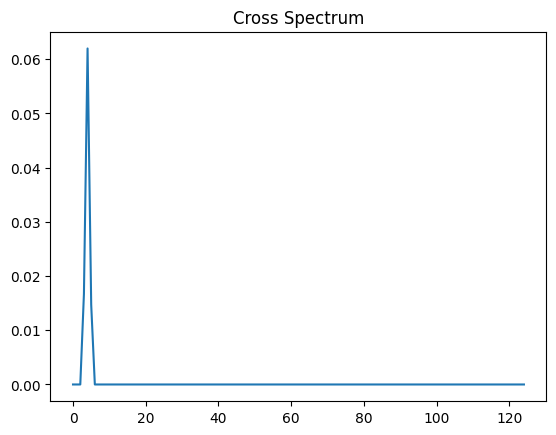

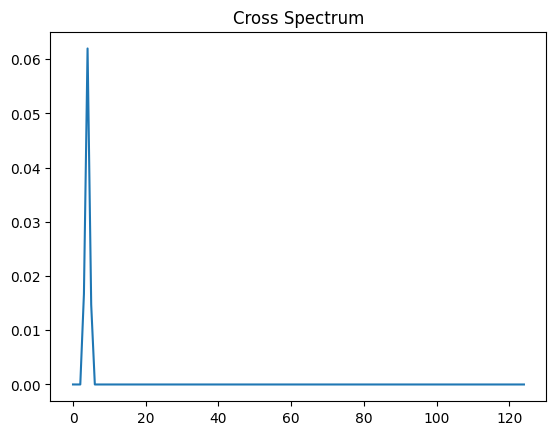

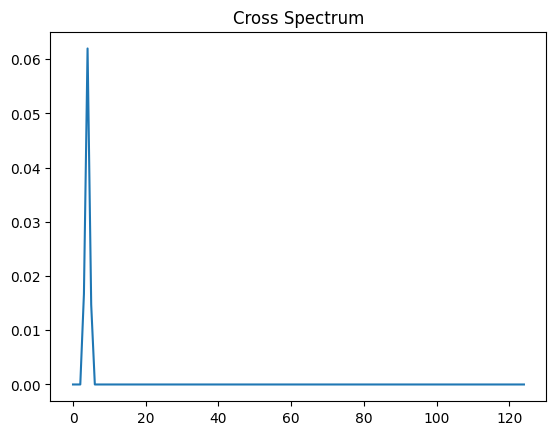

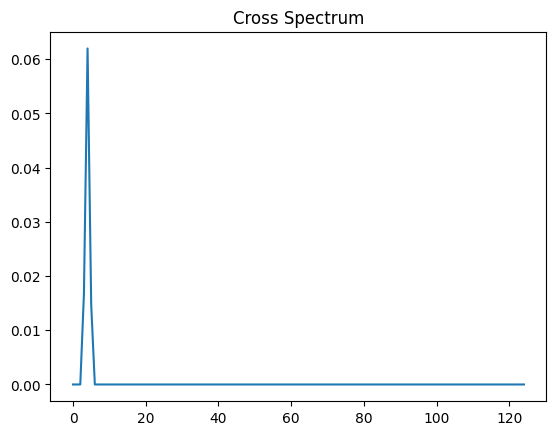

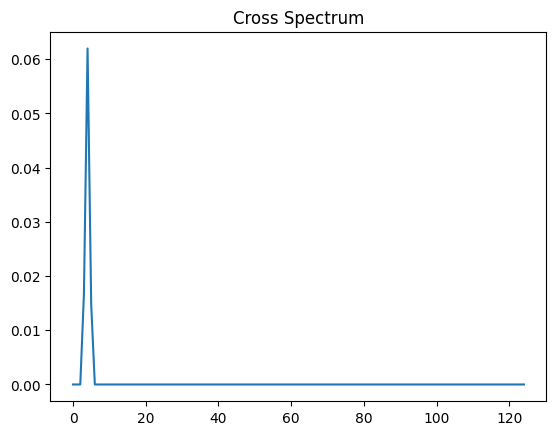

In [40]:
crossSpectrum_Welsh(cossignal1, cossignal2)

In [ ]:
Pxy = crossSpectrum_Welsh(x, y, nperseg = 50, overlap = 25)
Pxx = crossSpectrum_Welsh(x, x, nperseg = 50, overlap = 25)
Pyy = crossSpectrum_Welsh(y, y, nperseg = 50, overlap = 25)
coh = np.abs(Pxy) / np.sqrt(Pxx * Pyy)
plt.plot(coh[len(coh)//2:])
plt.show()
coh = signal.coherence(x, y, nperseg=50, noverlap=25)
plt.plot(coh[1])
plt.show()